In [170]:
import pandas as pd
import numpy as np
import os

import snscrape.modules.twitter as sntwitter
from time import sleep

import datetime
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta
import pickle

pd.set_option('Display.max_columns', 100)
pd.set_option('Display.max_rows', 100)

### ★ Load Twitter sentiment data from pickle files

In [98]:
twitter = pd.concat([pd.read_pickle(r'../data_scrap/bert/'+x) for x in os.listdir('../data_scrap/bert/')])
twitter.reset_index(drop = True, inplace = True)

In [132]:
twitter.shape

(2030051, 16)

In [168]:
# Change datetime structure from y-m-d-h-s to y-m-d
twitter['Date'] = pd.to_datetime(twitter['Date']).dt.date
twitter['Date'].head()

0    2010-01-07
1    2010-01-07
2    2010-01-07
3    2010-01-07
4    2010-01-07
Name: Date, dtype: object

### ★ Compare number of observations in each year from 2010 ~ 2021

In [133]:
# Deleting duplicated values for Content

twitter = twitter.loc[~twitter['Content'].duplicated()]
twitter.shape

(2030051, 16)

In [158]:
date = twitter['Date'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [167]:
date.str.contains("2010").sum(), date.str.contains("2011").sum(), date.str.contains("2012").sum()

(24342, 66098, 89221)

In [162]:
date.str.contains("2013").sum(), date.str.contains("2014").sum(), date.str.contains("2015").sum()

(113605, 113995, 153414)

In [163]:
date.str.contains("2016").sum(), date.str.contains("2017").sum(), date.str.contains("2018").sum()

(141726, 90834, 135679)

In [164]:
date.str.contains("2019").sum(), date.str.contains("2020").sum(), date.str.contains("2021").sum()

(113965, 261936, 284028)

### ★ Groupby all observations using Date to see the average Score on each day 

In [169]:
df = twitter.groupby('Date').mean()
df

,UserFollowersCount,UserFollowingCount,ReplyCount,RetweetCount,LikeCount,Score
Date,,,,,,
2010-01-01,2082.181818,1331.727273,0.000000,0.000000,0.000000,0.110445
2010-01-02,2414.250000,1593.500000,0.000000,0.000000,0.250000,0.234619
2010-01-03,2019.625000,1297.500000,0.000000,0.000000,0.000000,0.260956
2010-01-04,12562.666667,630.533333,0.000000,0.066667,0.044444,0.278325
2010-01-05,9420.153846,409.282051,0.000000,0.051282,0.000000,0.063722
...,...,...,...,...,...,...
2022-09-26,12153.876930,474.215266,0.756003,0.654803,8.443825,0.049181
2022-09-27,6640.073524,466.089784,0.726052,0.521739,6.569813,0.038724
2022-09-28,5026.257069,418.321704,0.676460,0.456115,5.610723,0.083828


In [171]:
# Mean values of scores for all time periods
df["Score"].mean()

0.10142695195218987

<AxesSubplot:xlabel='Date'>

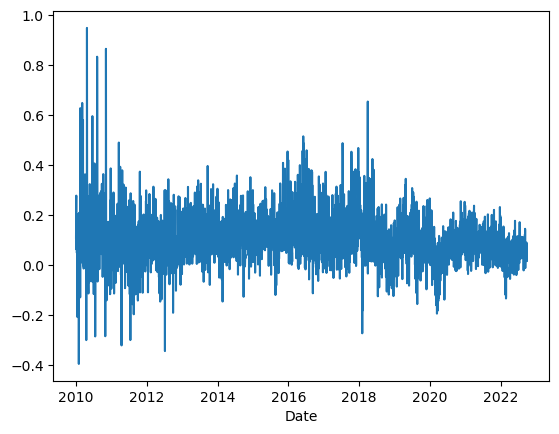

In [103]:
df['Score'].plot()

### ☆ Check for Anomalies

In [172]:
df.loc[df['Score'] > 0.65]

,UserFollowersCount,UserFollowingCount,ReplyCount,RetweetCount,LikeCount,Score
Date,,,,,,
2010-04-24,431.000000,515.500000,0.00000,0.000000,0.00000,0.948872
2010-08-07,10379.666667,751.666667,0.00000,0.000000,0.00000,0.833735
2010-11-06,25448.250000,501.000000,0.00000,0.000000,0.00000,0.865299
2018-04-01,12710.225352,18354.450704,0.15493,0.225352,0.71831,0.654479


In [178]:
import datetime

twitter.loc[twitter['Date'] == datetime.date(2010,4,24), 'Content']

5716    fascinated to know how many of us have beat the $SPY over the last 2 months. All that hard work and the ETF beats us..aghh $$        
5717    wow if this 3rd leg plays out which it sure looks like, the $SPY is going to 1380 on this recent rally. insane. check out the weekly.
Name: Content, dtype: object

In [182]:
twitter.loc[twitter['Date'] == datetime.date(2010,8,7), 'Content']

14145    E: On my way out to enjoy the beautiful NYC day. Just wanted to tweet that getting neutral on $SPY. Few trades make my heart skip a bit.    
14146    Dow rose 187.62 points,or 1.79% to 10653.56,Nasdaq gained 33.77 points,or 1.50% to 2288.47and S&P500 added 20.04 points,or 1.82% to 1121.64.
14147    The MSCI Asia Pacific Index rose 2.8 percent this week to a three-month high of 122.40, its longest streak of weekly gains since April 2009.
Name: Content, dtype: object

In [183]:
twitter.loc[twitter['Date'] == datetime.date(2010,11,6), 'Content']

21158    The best performing ETF for Nov. that we track is the iShares MSCI Hong Kong Index (Symbol: EWH) up 7.74%                                   
21159    ...Instead, I'm looking for the markets to soar to new highs, which traditionally happens this time of year anyway Trade with the trend $SPY
21160    August 2010: \nEnrolled in a trading course with S&P 500 trader Larry Levin. I think I've learned a lot - now start trading S&P500 eminis.  
21161    not gonna fail msci, hallelujah                                                                                                             
Name: Content, dtype: object

In [181]:
twitter.loc[twitter['Date'] == datetime.date(2016,4,1), 'Content']

662412    Switched from $DUST over to $NUGT quickly today ...but missed some other long opportunities.  Can't be a die hard short in this market. $SPY
662413    $SPY  Gap filled                                                                                                                            
662414    $SPY  #stockmarkets Slow clap for the bulls Yellen really knows how to prop up a market higher. More delay will mean more pain when it drops
662415    Tell you one thing .. on this April Fool's, the Joke was on shorts .. $ES_F $SPY $SPX                                                       
662416    Markets o/n, US: S&amp;P500 +0.63%, DJIA +0.61%, Nasdaq +0.92%. Europe: Stoxx -1.72%, DAX -1.71%, CAC -1.43%, FTSE -0.47%.                  
                                                                     ...                                                                              
663091    $SPY $QQQ $IWM $DIA $TLSA $SUNE learning a failed methodology.  Think outside the bo

In [189]:
df.loc[df['Score'] < -0.25]

,UserFollowersCount,UserFollowingCount,ReplyCount,RetweetCount,LikeCount,Score
Date,,,,,,
2010-01-30,1291.555556,1545.888889,0.000000,0.000000,0.000000,-0.394419
2010-04-17,80048.250000,622.000000,0.000000,0.000000,0.000000,-0.299152
2010-07-18,48238.000000,2412.200000,0.000000,0.000000,0.000000,-0.284490
2010-10-30,1521.333333,1756.000000,0.000000,0.000000,0.000000,-0.283659
2011-04-16,328.400000,500.400000,0.000000,0.000000,0.000000,-0.320376
2011-07-16,38911.222222,1855.555556,0.111111,0.111111,0.000000,-0.298998
2012-07-07,3267.300000,889.400000,0.050000,0.050000,0.050000,-0.343020
2018-02-03,7814.365269,2603.377246,0.323353,0.736527,1.766467,-0.271939


In [195]:
twitter.loc[twitter['Date'] == datetime.date(2011,7,16), 'Content'] #9

47483    Another CEO falls in the News Corp phone hacking scandal. It's sad that it took a public outcry to scare the corporation straight. #dowjones
47484    FYI #Murdoch's norm way to hire non US citizens to work in US for #dowjones #Newscorp is by encouraging a lie on I visa  and employees I-9  
47485    WARNING TO SHORTS - Indicators suggest a significant equity rally is now likely - $ES_F $SPY $SPX $EURUSD $$ - [Jul. 15 at 11:16 PM]        
47486    Long Term Market Analysis: Equities Toppish, Gold and Silver Bull! $GDX $SPY $SLV: Drizzt: long term market analysis is a series once or…   
47487    U.S. Markets are closed. Dow30 +0.34% S&P500 +0.56% NASDAQ100 +0.98%                                                                        
47488    RT @mranti RT @dkberman: Breaking from WSJ: DowJones CEO Les Hinton is stepping down, latest resignation in hacking scandal.                
47489    RT @dkberman: Breaking from WSJ: DowJones CEO Les Hinton is stepping down, latest resignati

In [201]:
twitter.loc[twitter['Date'] == datetime.date(2012,7,7), 'Content'] # 20

138831    Not to mention fires in the West, power outages in the East, if you don't short retail you're a moron. IMHO. $SPY $TLT $GLD #yesitsSaturday     
138832    I know it's Saturday but this #heatwave gonna put a damper on the economy when the A/C bills roll in IMHO. #longhotsummer $SPY $TLT $GLD        
138833    MTS: New option trade on $BAC is posted. $SPY $XLF  #stocks #options #trading                                                                   
138834    *spoiler alert--- this is all a dream $spy$iwm$vix                                                                                              
138835    Top Stock searches on message boards and Twitter: $MIMV $AAPL $BCND $AA $SPY (01:30 pm) #stocks #finance #stockmarket #StockPicks               
138836    Anyone else notice how FLAT those recently FALLING 50sma(s) are getting? Constructive $$ $SPY $IWM $QQQ $DIA                                    
138837    Not sure why ppl are obsessed with the S&amp;P500 &amp; the 

In [198]:
twitter.loc[twitter['Date'] == datetime.date(2018,2,3), 'Content'] # 167

869144    $SPX $SPY $DIA $QQQ Trend is ur friend but stoploss/hedge/exit plan is ur BEST FRIEND! Best friend will protect u from bad friends n serve you well in long run!                                                                                                                       
869145    ITCHIN for market open Sunday night... interesting week ahead $djia $spy $qqq $vix                                                                                                                                                                                                     
869146    My ongoing watchlist flourishes at the intersection of tradable liquidity and top 20% of 3-month volatility and a history of sweet swings. 4 stocks were green Friday... out of 58. $spy                                                                                               
869147    No one seems very worried about the selloff Friday in the $SPY and other indexes. Wouldn’t be surprised to see some foll

### ★ Export score variable for modeling

In [204]:
df_out = df.loc[:,'Score']
df_out.head()

Date
2010-01-01    0.110445
2010-01-02    0.234619
2010-01-03    0.260956
2010-01-04    0.278325
2010-01-05    0.063722
Name: Score, dtype: float64

In [206]:
df_out.to_csv("./sent_score.csv", index = True)